In [6]:
import pandas as pd
import re
import numpy as np  # Added for centroid computation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('resume_data.csv')
print("Number of resumes per category:\n", df['Category'].value_counts())
print("Dataset Shape:", df.shape)

Number of resumes per category:
 Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64
Dataset Shape: (962, 2)


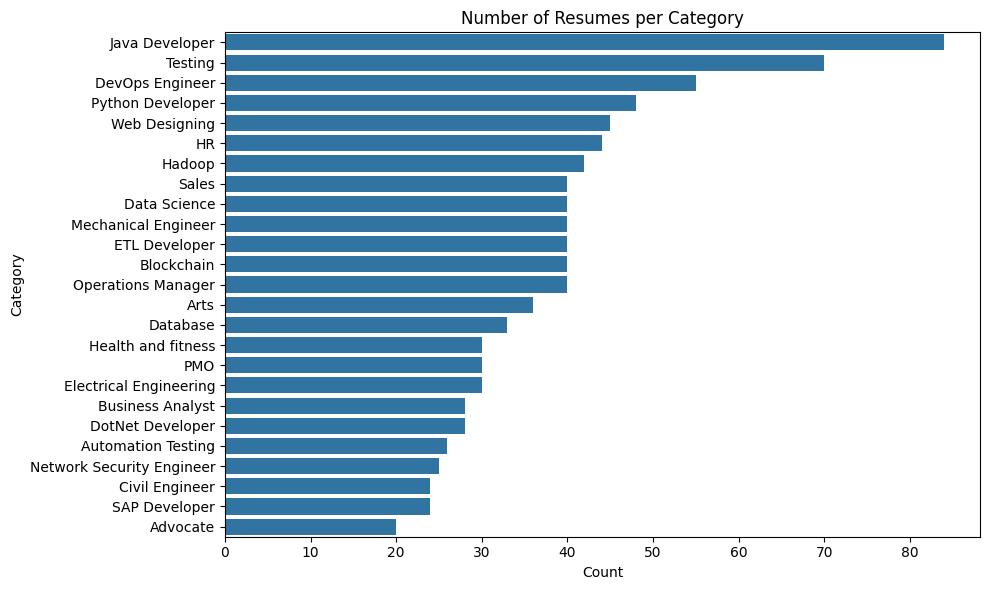

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title('Number of Resumes per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [9]:
# Clean resume text
def clean_resume(text):
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters & numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    return ' '.join(text)

In [10]:
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)

In [11]:
vectorizer = TfidfVectorizer(max_features=3000)  # Extract top 3000 keywords
X = vectorizer.fit_transform(df['Cleaned_Resume']).toarray()
y = df['Category']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [13]:
# === New Code: Compute Centroids for Each Category ===
centroids = {}
for category in set(y_train):
    # Get indices of resumes in this category
    category_indices = np.where(y_train == category)[0]
    # Extract their TF-IDF vectors
    category_vectors = x_train[category_indices]
    # Compute the mean vector (centroid)
    centroid = np.mean(category_vectors, axis=0)
    centroids[category] = centroid
# Save centroids to a file
joblib.dump(centroids, 'category_centroids.pkl')
print("📦 Category centroids saved successfully!")

📦 Category centroids saved successfully!


In [14]:
model = MultinomialNB()
model.fit(x_train, y_train)


MultinomialNB()

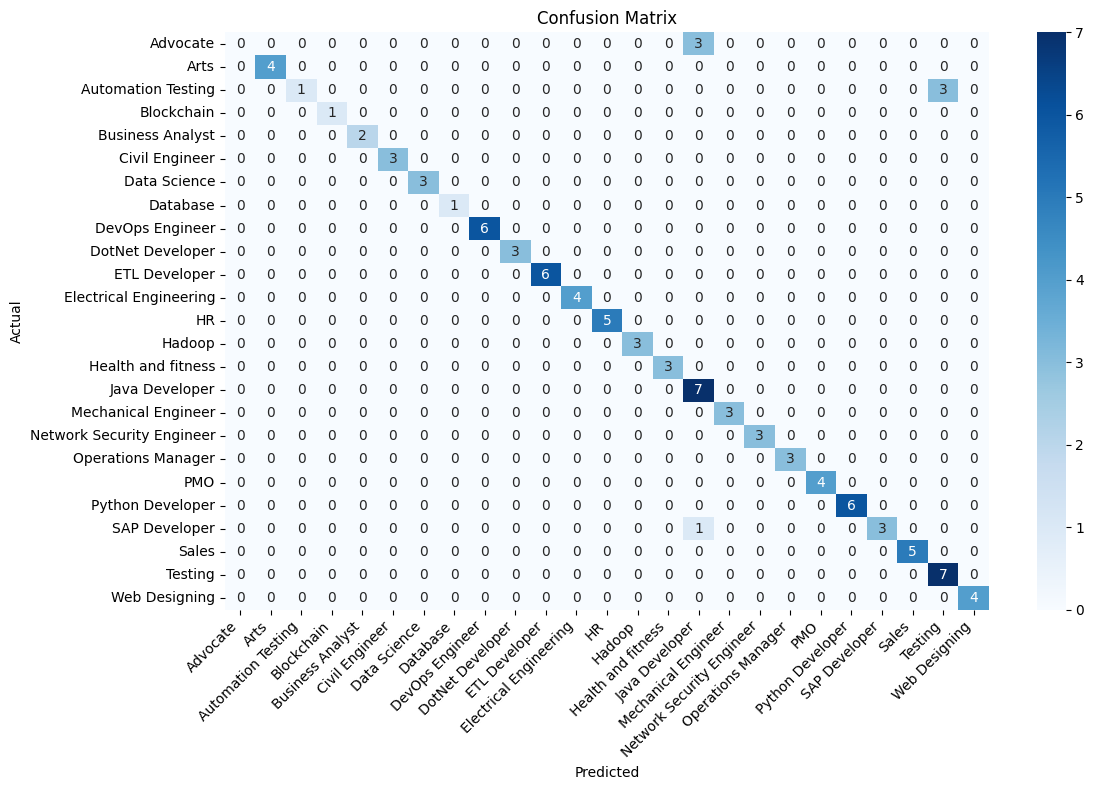

In [15]:
y_pred = model.predict(x_test)  # Ensure y_pred is defined
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
y_pred = model.predict(x_test)
print("\n✅ Accuracy of Model:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)


✅ Accuracy of Model: 0.9278350515463918
📊 Confusion Matrix:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [17]:
joblib.dump(model, 'ats_nb_model.pkl')
joblib.dump(vectorizer, 'ats_vectorizer.pkl')
print("\n📦 Model and vectorizer saved successfully!")


📦 Model and vectorizer saved successfully!


In [18]:
report_summary = {label: round(metrics["f1-score"], 2) for label, metrics in report.items() if label in df['Category'].unique()}

In [19]:
report_summary

{'Advocate': 0.0,
 'Arts': 1.0,
 'Automation Testing': 0.4,
 'Blockchain': 1.0,
 'Business Analyst': 1.0,
 'Civil Engineer': 1.0,
 'Data Science': 1.0,
 'Database': 1.0,
 'DevOps Engineer': 1.0,
 'DotNet Developer': 1.0,
 'ETL Developer': 1.0,
 'Electrical Engineering': 1.0,
 'HR': 1.0,
 'Hadoop': 1.0,
 'Health and fitness': 1.0,
 'Java Developer': 0.78,
 'Mechanical Engineer': 1.0,
 'Network Security Engineer': 1.0,
 'Operations Manager': 1.0,
 'PMO': 1.0,
 'Python Developer': 1.0,
 'SAP Developer': 0.86,
 'Sales': 1.0,
 'Testing': 0.82,
 'Web Designing': 1.0}

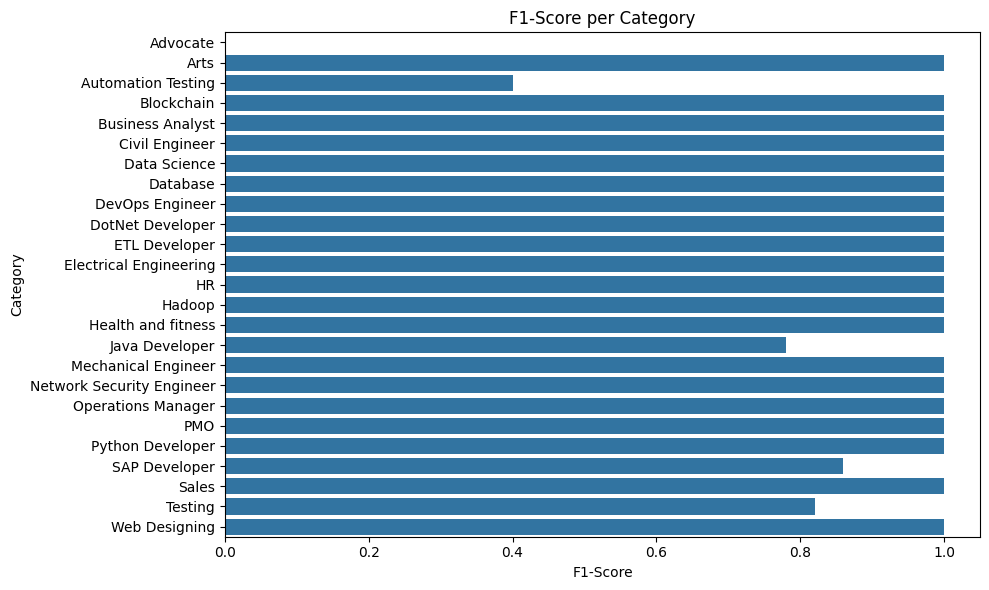

In [20]:
plt.figure(figsize=(10, 6))
categories = list(report_summary.keys())
f1_scores = list(report_summary.values())
sns.barplot(x=f1_scores, y=categories)
plt.title('F1-Score per Category')
plt.xlabel('F1-Score')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [21]:
# === Resume Category Prediction & Similarity Score ===
from sklearn.metrics.pairwise import cosine_similarity

# Function to clean and vectorize resume text
def clean_and_vectorize_resume(resume_text):
    cleaned = clean_resume(resume_text)  # Assuming your existing clean_resume() function is available
    resume_vec = vectorizer.transform([cleaned]).toarray()
    return resume_vec

# Function to predict resume category and compute similarity score
def predict_resume_category_and_score(resume_text):
    resume_vec = clean_and_vectorize_resume(resume_text)
    predicted_category = model.predict(resume_vec)[0]

    # Load centroids (category-wise TF-IDF means)
    import joblib
    centroids = joblib.load('category_centroids.pkl')  # Ensure this file exists in your project

    # Calculate cosine similarity between resume vector and the centroid of predicted category
    centroid_vec = centroids[predicted_category].reshape(1, -1)
    score = cosine_similarity(resume_vec, centroid_vec)[0][0] * 100  # Convert to percentage
    return predicted_category, round(score, 2)



In [24]:
# === Example usage ===
sample_resume = df['Resume'][10]  # Replace with uploaded resume content if needed
category, resume_score = predict_resume_category_and_score(sample_resume)

print(f"📌 Resume Predicted Category: {category}")
print(f"📈 Resume Similarity Score to Category Centroid: {resume_score}%")


📌 Resume Predicted Category: Data Science
📈 Resume Similarity Score to Category Centroid: 46.85%
